# Analysis

In [1]:
import logging
from stages import PreProcessing, CommunityDetection, Metrics
from config import Config
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

log_format = '%(name)s - %(message)s'
logging.basicConfig(format=log_format)
root_logger = logging.getLogger()
# root_logger.setLevel(logging.INFO)

## Pre Processing

In [2]:
pre_processing = PreProcessing(Config())
pre_processing.execute()
pre_processing.save()

edges = pre_processing.edges

## Community Detection

In [3]:
# demon config
epsilon = [0.25, 0.5, 0.75]
min_community_size = 3

cd = {}

for e in epsilon:
    config = Config(
        demon={
            'epsilon': e,
            'min_community_size': min_community_size
        })
    cd[e] = CommunityDetection(config, edges)
    cd[e].execute()
    cd[e].save()

## Metrics

In [4]:
m = {}
    
for e in epsilon:
    m[e] = Metrics(config, cd[e].nodes, cd[e].edges)
    m[e].execute()
    m[e].save()

100%|██████████| 48/48 [00:02<00:00, 21.42it/s] 


/home/flaprimo/Development/Workspaces/ZikaProject/Python/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


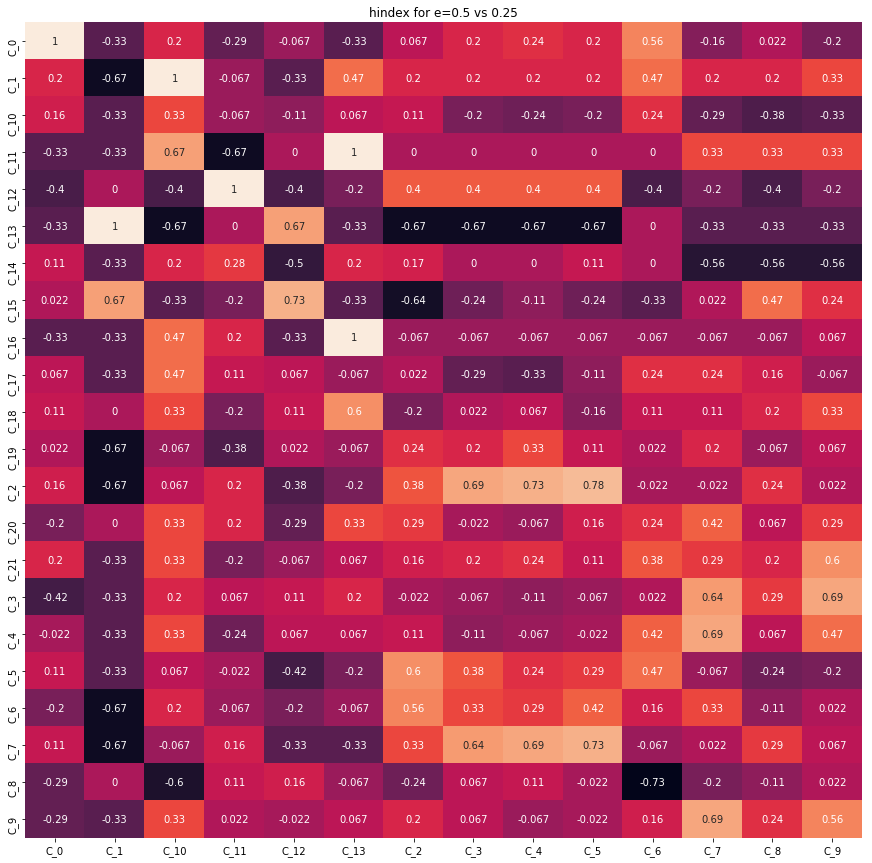

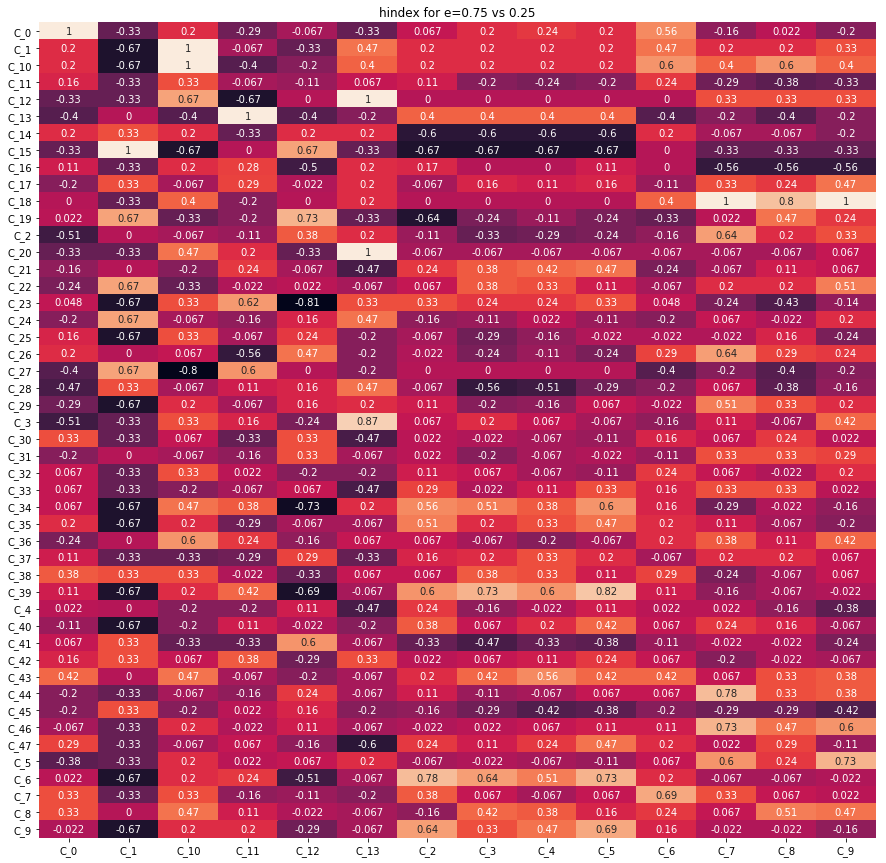

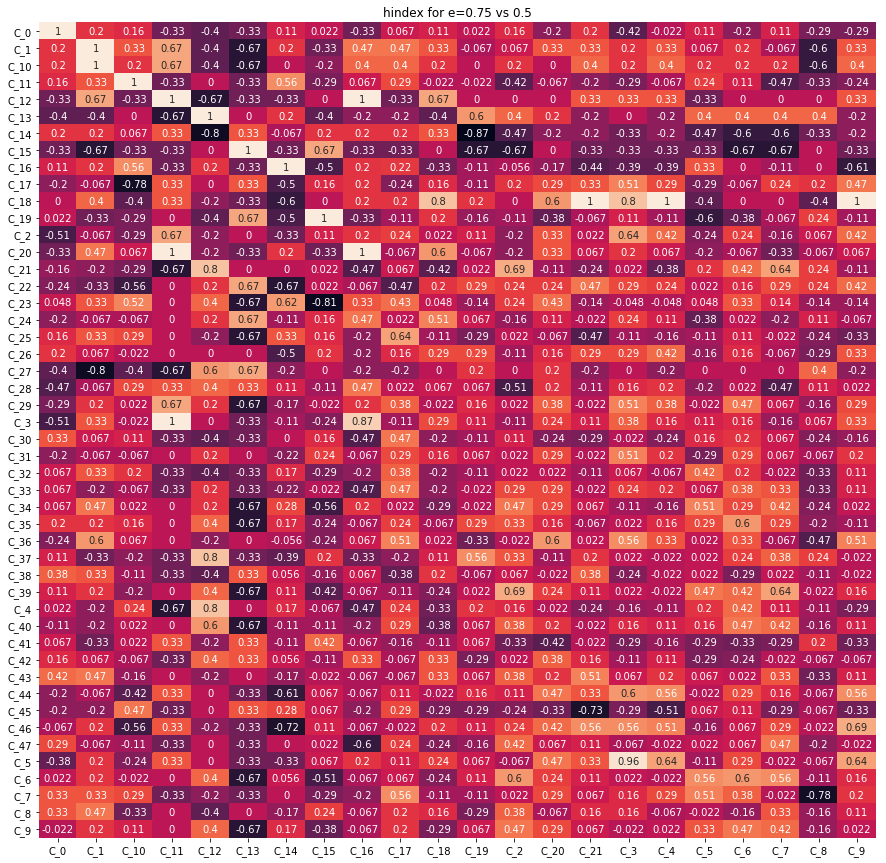

In [5]:
for x, y in [[0.5, 0.25], [0.75, 0.25], [0.75, 0.5]]:
    p1 = Metrics.metric_top(m[x].metric_top_values('hindex'))
    p2 = Metrics.metric_top(m[y].metric_top_values('hindex'))

    hm = Metrics.compare_metric_top(p1, p2)
    
    plt.figure(figsize = (15, 15))
    ax = sns.heatmap(hm, annot=True, cbar=False).set_title(f'hindex for e={x} vs {y}')
    plt.show()